In [1]:
# Moduli
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
# Funzione per creare la panoramica generale di un dataframe
def overview(df):

    # Prime 5 righe
    display(df.head())
    
    # Dimensione
    display(df.shape)
    
    # Presenza di duplicati
    print("Duplicati: ", df.duplicated().sum())
    
    # Presenza di valori nulli
    if df.isnull().values.any() == False:
        print("Nulli: ", df.isnull().values.any())
    else:
        print("\nNulli:\n\n", df.isnull().sum())
    
    # Tipo dati
    display(df.dtypes)

In [3]:
# Importazione dei dati
data = pd.read_csv('kc_house_data.csv', usecols=["id", "price", "sqft_living"])

# Panoramica del dataset
overview(data)

,id,price,sqft_living
0,7129300520,221900.0,1180
1,6414100192,538000.0,2570
2,5631500400,180000.0,770
3,2487200875,604000.0,1960
4,1954400510,510000.0,1680


(21613, 3)

Duplicati:  3
Nulli:  False


id               int64
price          float64
sqft_living      int64
dtype: object

In [4]:
# Rimozione duplicati
data.drop_duplicates(inplace=True)

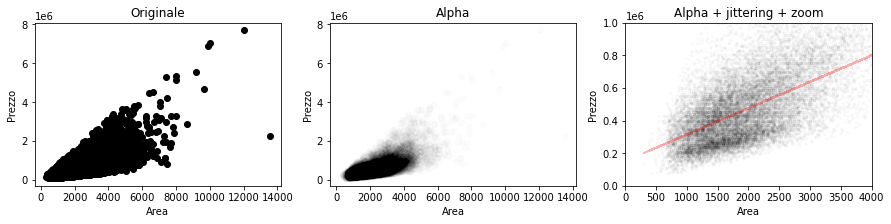

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

# Scatterplot originale
ax[0].scatter(data.sqft_living, data.price, color="black")
ax[0].set_title("Originale")
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Prezzo")

# Scatterplot con alpha tarato
ax[1].scatter(data.sqft_living, data.price, alpha=0.01, color="black")
ax[1].set_title("Alpha")
ax[1].set_xlabel("Area")
ax[1].set_ylabel("Prezzo")

# Jittering
sqft_jitter = data.sqft_living + np.random.normal(0,2, size=len(data))
price_jitter = data.price + np.random.normal(0,2, size=len(data))

# Modello predittivo
subset = data[(data.sqft_living <= 4000) & (data.price <= 1e6)]
model = ols('price ~ sqft_living', data=subset).fit()

# Scatterplot con jittering, alpha tarato e zoom
ax[2].scatter(sqft_jitter, price_jitter, alpha=0.015, color="black", s=5)

# Linea di regressione
ax[2].plot(sqft_jitter, model.predict(sqft_jitter), color="red", alpha=0.3)

# Limitazione degli assi
ax[2].axis([0, 4000, 0, 1e6])
ax[2].set_title("Alpha + jittering + zoom")
ax[2].set_xlabel("Area")
ax[2].set_ylabel("Prezzo");